In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from pprint import pprint

In [2]:
import segyio

In [3]:
path = pathlib.Path('/work/bfilippo/cervino/notebooks/slices')

In [24]:
# for sl in path.glob('*.su'):
#     print(sl)

In [30]:
# slices_fn = sorted(list(path.glob('vz_slice_ricker_10hz_0*.su')))
# slices_fn = sorted(list(path.glob('vz_slice_ricker_20hz_0*.su')))
# slices_fn = sorted(list(path.glob('vz_slice_ricker_10hz_filtered_10hz_0*.su')))
slices_fn = sorted(list(path.glob('vz_slice_ricker_20hz_filtered_10hz_0*.su')))
# slices_fn = sorted(list(path.glob('vz_slice_sine_10hz*.su')))
pprint(slices_fn[0].resolve())

PosixPath('/work/bfilippo/cervino/notebooks/slices/vz_slice_ricker_20hz_filtered_10hz_00000000.su')


In [31]:
nx, nz = 2301, 751
ns = len(slices_fn)
inc = 1
dt = 0.0004
print(f'There are {ns} slices and the increment is {dt*inc}')

There are 5000 slices and the increment is 0.0004


In [ ]:
# slices = np.empty((ns, nx, nz), dtype=np.float32)

In [ ]:
# for i in range(ns):
#     with segyio.su.open(str(slices_fn[i]), ignore_geometry=True, endian='little') as f:
#         slices[i, ...] = f.trace.raw[:]

In [ ]:
# clip = 1e-10
# vmin, vmax = -clip, clip
# i = 499
# plt.imshow(slices[i, ...].T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax, aspect=1)

In [32]:
freq_ricker = 20
freq = 10
dft = np.zeros((nx, nz), dtype=np.complex64)
for i in range(ns):
    if i % 100 == 0:
        print(f'Reading the {i}th slice')
    with segyio.su.open(str(slices_fn[i]), ignore_geometry=True, endian='little') as f:
        sl = f.trace.raw[:].astype('float32')
    dft += np.exp(-2j * np.pi * freq * i * dt * inc) * sl

Reading the 0th slice
Reading the 100th slice
Reading the 200th slice
Reading the 300th slice
Reading the 400th slice
Reading the 500th slice
Reading the 600th slice
Reading the 700th slice
Reading the 800th slice
Reading the 900th slice
Reading the 1000th slice
Reading the 1100th slice
Reading the 1200th slice
Reading the 1300th slice
Reading the 1400th slice
Reading the 1500th slice
Reading the 1600th slice
Reading the 1700th slice
Reading the 1800th slice
Reading the 1900th slice
Reading the 2000th slice
Reading the 2100th slice
Reading the 2200th slice
Reading the 2300th slice
Reading the 2400th slice
Reading the 2500th slice
Reading the 2600th slice
Reading the 2700th slice
Reading the 2800th slice
Reading the 2900th slice
Reading the 3000th slice
Reading the 3100th slice
Reading the 3200th slice
Reading the 3300th slice
Reading the 3400th slice
Reading the 3500th slice
Reading the 3600th slice
Reading the 3700th slice
Reading the 3800th slice
Reading the 3900th slice
Reading the 

In [33]:
# dft.tofile(f'dft_ricker_{freq_ricker}hz.bin')
dft.tofile(f'dft_ricker_{freq_ricker}hz_filtered_{freq}hz.bin')
# dft.tofile(f'dft_sine_{freq}hz.bin')

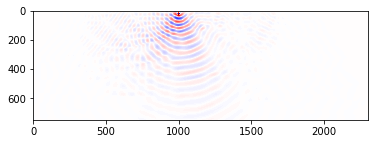

In [34]:
clip = 1e-7
vmin, vmax = -clip, clip
plt.imshow(dft.real.T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax, aspect=1)
# plt.xlim(700, 1300)
# plt.ylim(300, 0)